In [24]:
import cv2 as cv 
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('testpat1.tif',0)
#Magnitude spectrum of the image 
f = np.fft.fft2(img)

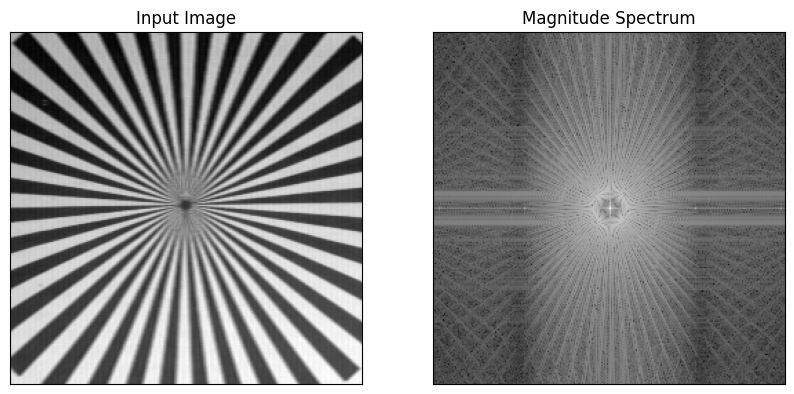

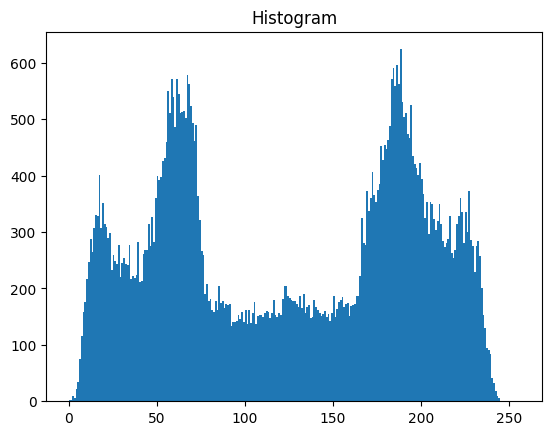

In [25]:
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

# Plot the original image and its magnitude spectrum
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Input Image')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.xticks([])
plt.yticks([])

plt.show()

# Plot the histogram of the image
plt.figure()
plt.hist(img.ravel(), 256, [0, 256])
plt.title('Histogram')
plt.show()

Explanation of the Magnitude Spectrum and FFT in Image Processing
The magnitude spectrum of an image shows the frequency components present in the image. It is a way to represent the image in the frequency domain rather than the spatial domain. Here's a step-by-step explanation of what the code does with the Fast Fourier Transform (FFT):

Read the Image:

The image is read in grayscale mode.

Compute the 2D Fourier Transform:

The 2D Fourier Transform is computed using np.fft.fft2(). This transforms the image from the spatial domain to the frequency domain. The result is a complex array where each element represents a frequency component of the image.

Shift the Zero Frequency Component to the Center:

The zero frequency component (DC component) is shifted to the center of the spectrum using np.fft.fftshift(). This makes it easier to visualize the frequency components.

Compute the Magnitude Spectrum:

The magnitude spectrum is computed by taking the logarithm of the absolute value of the shifted Fourier Transform. The logarithm is used to enhance the visibility of the spectrum, as the range of values can be very large.

Plot the Original Image and its Magnitude Spectrum:

The original image and its magnitude spectrum are plotted side by side for comparison. The magnitude spectrum shows the frequency components of the image, with low frequencies at the center and high frequencies at the edges.

Plot the Histogram of the Image:

The histogram of the image is plotted to show the distribution of pixel intensities.

Interpretation of the Magnitude Spectrum
Low Frequencies: These are located at the center of the magnitude spectrum and represent the overall structure and smooth variations in the image.
High Frequencies: These are located at the edges of the magnitude spectrum and represent the fine details and edges in the image.
By analyzing the magnitude spectrum, you can understand the frequency content of the image, which is useful in various image processing tasks such as filtering, compression, and enhancement.

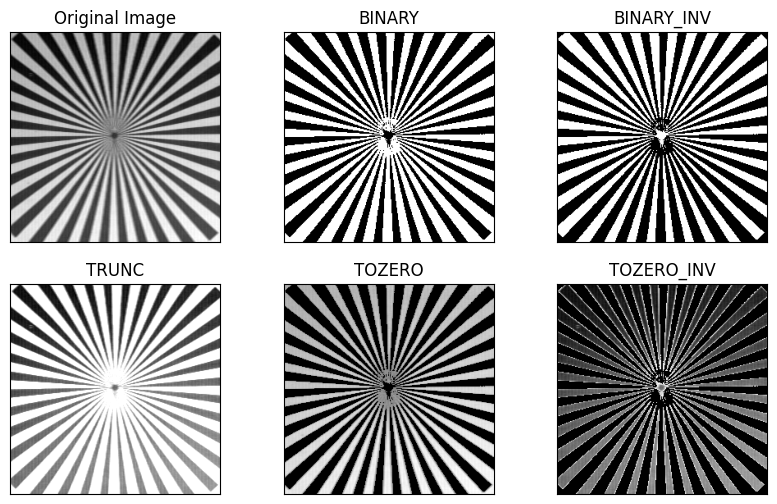

In [26]:
# Apply different thresholding techniques
_, thresh1 = cv.threshold(img, 120, 255, cv.THRESH_BINARY)
_, thresh2 = cv.threshold(img, 120, 255, cv.THRESH_BINARY_INV)
_, thresh3 = cv.threshold(img, 120, 255, cv.THRESH_TRUNC)
_, thresh4 = cv.threshold(img, 120, 255, cv.THRESH_TOZERO)
_, thresh5 = cv.threshold(img, 120, 255, cv.THRESH_TOZERO_INV)

# Titles for the subplots
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

# Display images with different thresholding techniques
plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()


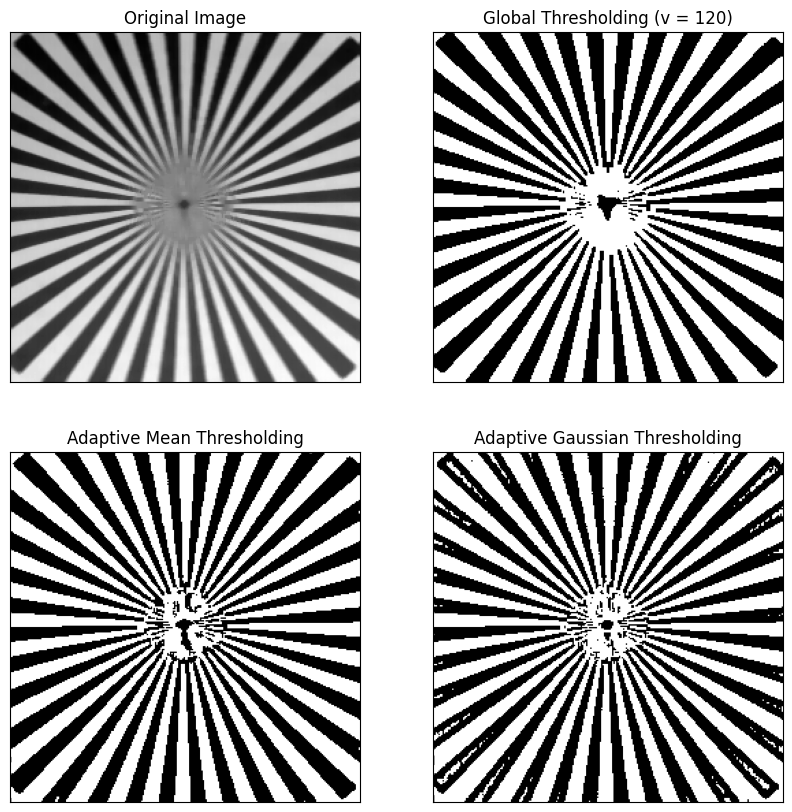

In [27]:

# Apply median blur to reduce noise
img = cv.medianBlur(img, 5)

# Global Thresholding
ret, th1 = cv.threshold(img, 120, 255, cv.THRESH_BINARY)

# Adaptive Mean Thresholding
th2 = cv.adaptiveThreshold(
    img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2
)

# Adaptive Gaussian Thresholding
th3 = cv.adaptiveThreshold(
    img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2
)

# Titles for subplots
titles = [
    'Original Image', 
    'Global Thresholding (v = 120)', 
    'Adaptive Mean Thresholding', 
    'Adaptive Gaussian Thresholding'
]

# Store images
images = [img, th1, th2, th3]

# Plot images
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

#### Automatic determination of the threshold

In this part of the exercise, we will demonstrate the success of K − means algorithm in automatic 
determination of the threshold. We will use kmeans(). Output variable c of the function contains 
the calculated centers of the classes in which we group the image pixel intensities.

ret: 55164564.652129084
labels: [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
clusters: [[ 58.58175]
 [186.3887 ]]


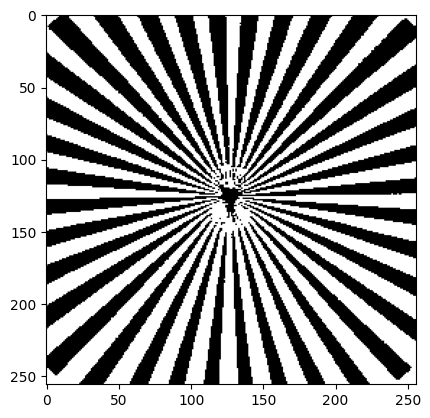

In [28]:

# Load the image in grayscale
img = cv.imread('testpat1.tif', 0)

# Reshape the image for k-means clustering
reshaped_image = np.float32(img.reshape(-1, 1))

# Set the number of clusters
number_of_clusters = 2

# Set the stop criteria for k-means
stop_criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.1)

# Apply k-means clustering
ret, labels, clusters = cv.kmeans(reshaped_image, number_of_clusters, None,
                                   stop_criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Print the variables
print("ret:", ret) #  This is the compactness measure which is the sum of squared distances from each point to their corresponding centers.
print("labels:", labels) # This is an array of the same size as the input image, where each element is the cluster index (0, 1, ..., number_of_clusters-1) to which the corresponding pixel belongs.
print("clusters:", clusters) # This is an array of size (number_of_clusters, 1) where each element is the centroid of the corresponding cluster.

# Convert clusters to uint8 type
clusters = np.uint8(clusters)

# Reconstruct the clustered image
intermediate_image = clusters[labels.flatten()]
clustered_image = intermediate_image.reshape(img.shape)

# Display the clustered image
plt.imshow(clustered_image, cmap='gray')
plt.show()

#### Extraction of edges ( Canny Edge Detection ) 

For finding the edges in the image, we can use the function cv2.Canny(), which supports several 
methods for finding the edges. The function gives a binary image (same dimensions as the input image), which contains only the detected edges from the input image.

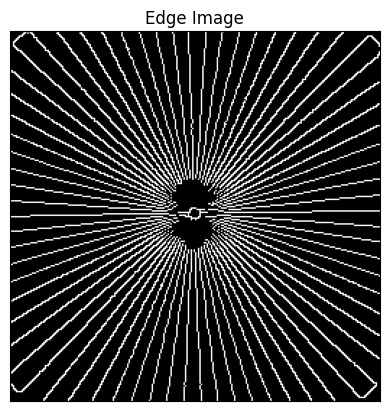

In [29]:
img = cv.imread('testpat1.tif',0) 
edges = cv.Canny(img,100,200) 
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()



We will segment the textures based on selected features. First, for each pixel in the image, we 
will calculate the selected feature on the defined neighborhood of the pixel Image containing the feature values is the image we will segment, 'Gabor kernel filter' used for this

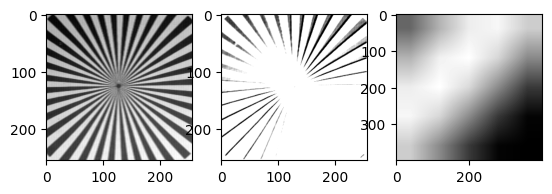

In [30]:
import numpy as np 
import cv2

import matplotlib.pyplot as plt

img =cv2.imread('testpat1.tif',0)

ksize = 5
sigma = 5
theta = 1*np.pi/4
lamda = 1*np.pi/4
gamma=0.9
phi = 0.8

kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F) 
fimg=cv2.filter2D(img, cv2.CV_8UC3, kernel)

kernel_resized = cv2.resize(kernel, (400, 400))
plt.subplot(1,3,1),plt.imshow(img, cmap='gray')
plt.subplot(1,3,2),plt.imshow(fimg, cmap='gray')
plt.subplot(1,3,3),plt.imshow(kernel_resized, cmap='gray')
plt.show()


#### Image Inpainting

OpenCV implements two inpainting algorithms:

1. “An Image Inpainting Technique Based on the Fast Marching Method”, Alexandru Telea, 
2004: 
This is based on Fast Marching Method (FMM). Looking at the region to be inpainted, 
the algorithm first starts with the boundary pixels and then goes to the pixels inside the 
boundary. It replaces each pixel to be inpainted with a weighted sum of the pixels in the 
background, with more weight given to nearer pixels and boundary pixels. 


2. “Navier-Stokes, Fluid Dynamics, and Image and Video Inpainting”, Bertalmio, Marcelo, 
Andrea L. Bertozzi, and Guillermo Sapiro, 2001: This algorithm is inspired by partial 
differential equations. Starting from the edges (known regions) towards the unknown 
regions, it propagates isophote lines (lines that join same-intensity points). Finally, 
variance in an area is minimized to fill colors.

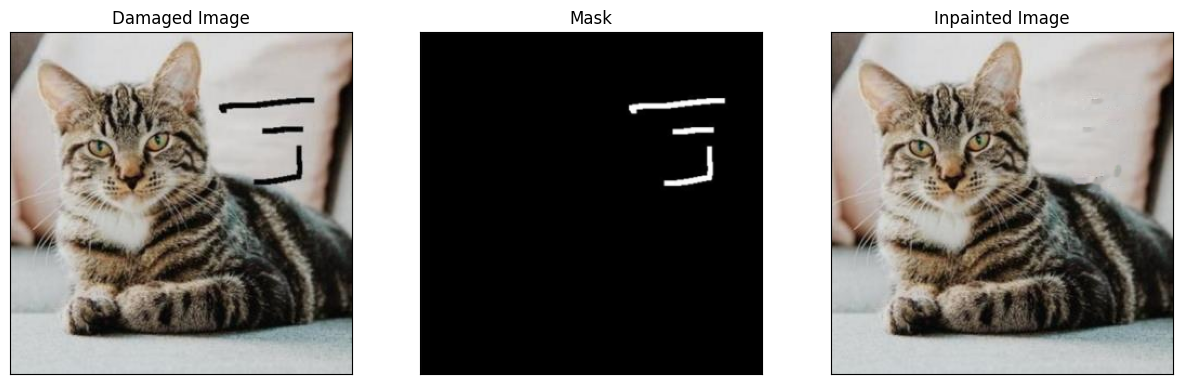

In [34]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Open the damaged image
img = cv2.imread('cat_damaged.png')

# Load the mask
mask = cv2.imread('cat_mask.png', 0)

# Ensure the mask size matches the image size
if img.shape[:2] != mask.shape:
    mask = cv.resize(mask, (img.shape[1], img.shape[0]), interpolation=cv.INTER_NEAREST)

# Inpaint
dst = cv2.inpaint(img, mask, 3, cv2.INPAINT_NS)

# Write the output
cv2.imwrite('cat_inpainted.png', dst)

# Convert images from BGR to RGB for displaying with Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
dst_rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

# Plot the images
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(img_rgb)
plt.title('Damaged Image')
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.xticks([]), plt.yticks([])

plt.subplot(133)
plt.imshow(dst_rgb)
plt.title('Inpainted Image')
plt.xticks([]), plt.yticks([])

plt.show()